Import dependencies

In [1]:
import pandas as pd
%matplotlib inline
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

## Data Set

The dataset is related to red variant of the Portuguese "Vinho Verde" wine, recorded in 2009.

Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.)

Source: https://archive.ics.uci.edu/ml/datasets/wine+quality

In [2]:
#load csv into a data frame 
redwine_df = pd.read_csv('wineQualityReds.csv')
redwine_df.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
#rename/clean up column names 
#define class as quality points (6)
#quality of wine rated on a 1-10 scale: data scores between 2-7 (6 classes of wine quality)
wine = pd.read_csv(os.path.join('wineQualityReds.csv'))
new_wine= wine.rename(columns={"quality": "Class","Unnamed: 0": "count"})

new_wine.head()

,count,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,Class
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Correlation

Visual showing the correaltion between these chemical components in red wine.

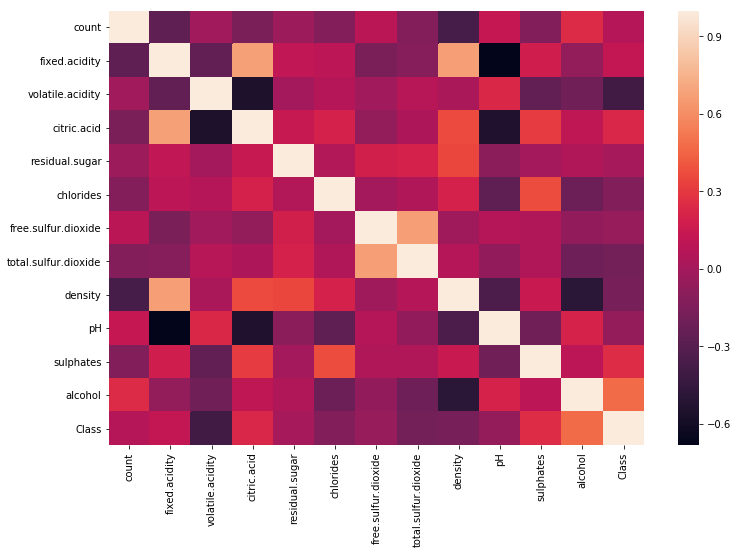

In [4]:
fig = plt.subplots(figsize = (12,8))
sns.heatmap(new_wine.corr())
plt.savefig("correlation.png")

Quantifying values of correlation matrix.

In [5]:
correlation = new_wine.corr()
correlation.head()

,count,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,Class
count,1.000000,-0.268484,-0.008815,-0.153551,-0.031261,-0.119869,0.090480,-0.117850,-0.368372,0.136005,-0.125307,0.245123,0.066453
fixed.acidity,-0.268484,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile.acidity,-0.008815,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric.acid,-0.153551,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual.sugar,-0.031261,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732


## KMeans

Machine Learning model for clustering the wine based on the 6 classes. 

In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)

kmeans.fit(redwine_df) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
predicted_clusters = kmeans.predict(redwine_df) 

wine_data = pd.read_csv('wineQualityReds.csv')
new_wine = wine_data.rename(columns={"quality": "Class"})

wine_df = pd.DataFrame(new_wine)
wine_df.Class = wine_df.Class - 1

## Density vs. Alcohol

A rule of thumb is, that the lower the percentage of alcohol, the more sugar is still in the fluid = heavier liquid

from: https://bartenderly.com/tips-tricks/alcohol-density-chart/

In [8]:
from sklearn.cluster import KMeans

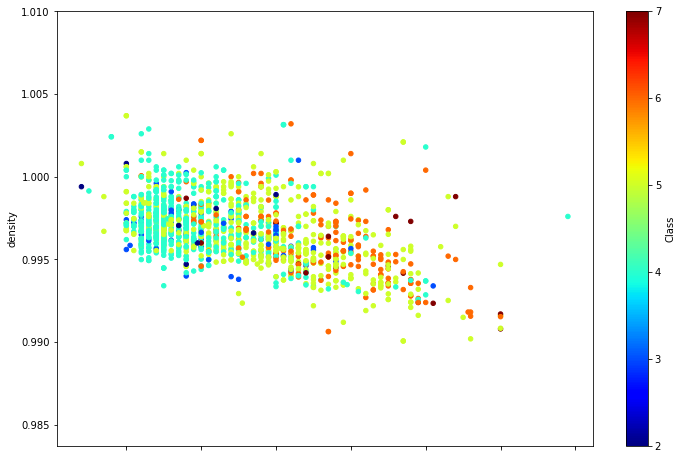

In [9]:
wine_df.plot.scatter(x = 'alcohol', y = 'density', c= 'Class', figsize=(12,8), colormap='jet')

In [10]:
kmeans = KMeans(n_clusters=6, init = 'k-means++', max_iter = 1000, 
                random_state = None).fit(wine_df.iloc[:,[11,8]])
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns = list(wine_df.iloc[:,[11,8]].columns.values))

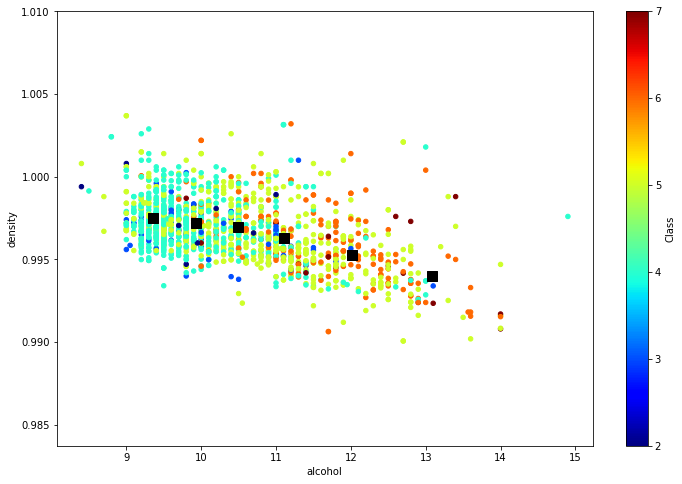

In [11]:
fig, ax = plt.subplots(1, 1)
wine_df.plot.scatter(x = 'alcohol', y = 'density', c= 'Class', figsize=(12,8), colormap='jet', ax=ax, mark_right=False)
centroids_df.plot.scatter(x = 'alcohol', y = 'density', c = 'black', ax = ax,  s = 100, marker='s')

In [12]:
centroids_df.head()

,alcohol,density
0,9.361446,0.997513
1,11.110606,0.996298
2,12.012500,0.995299
3,10.489196,0.996969
4,13.078095,0.994022


Linear regression on centroids.

In [61]:
from scipy.stats import linregress
slope, intercept, r, p, error = linregress(centroids_df["alcohol"], centroids_df["density"])
fit = slope * centroids_df["alcohol"] + intercept

Text(0, 0.5, 'Density')

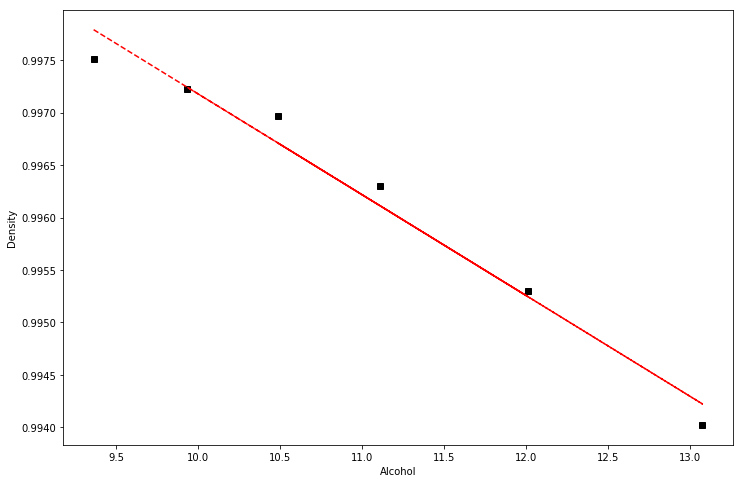

In [63]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(centroids_df["alcohol"], centroids_df["density"],linewidth="0", marker='s', color='black') #plot each instance
ax.plot(centroids_df["alcohol"], fit, 'r--')
plt.xlabel("Alcohol")
plt.ylabel("Density")

In [15]:
print("r:", r, 
      "error:", error)

r: -0.9873796991453698 error: 7.699191326169859e-05


## Density vs. Fixed Acidity

In wine, the more acidity it has, the more tart the wine will taste.

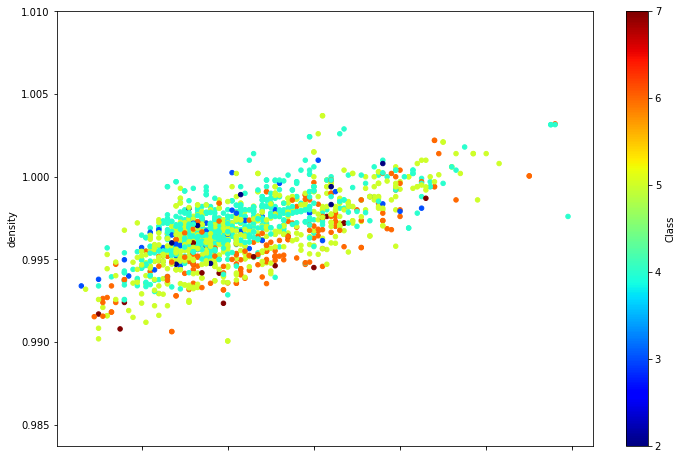

In [16]:
wine_df.plot.scatter(x = 'fixed.acidity', y = 'density', c= 'Class', figsize=(12,8), colormap='jet')
plt.savefig("densityacidityscatter.png")

In [33]:
kmeans = KMeans(n_clusters=6, init = 'k-means++', max_iter = 1000, random_state = None).fit(wine_df.iloc[:,[1,8]])
centroids_df2 = pd.DataFrame(kmeans.cluster_centers_, columns = list(wine_df.iloc[:,[1,8]].columns.values))

slope, intercept, r, p, error = linregress(centroids_df2["fixed.acidity"], centroids_df2["density"])
fit = slope * centroids_df2["fixed.acidity"] + intercept

In [42]:
#plt.title("Density vs. Fixed Acidity")
#plt.xlabel("Fixed Acidity")
#plt.ylabel("Density")
#plt.grid(True)

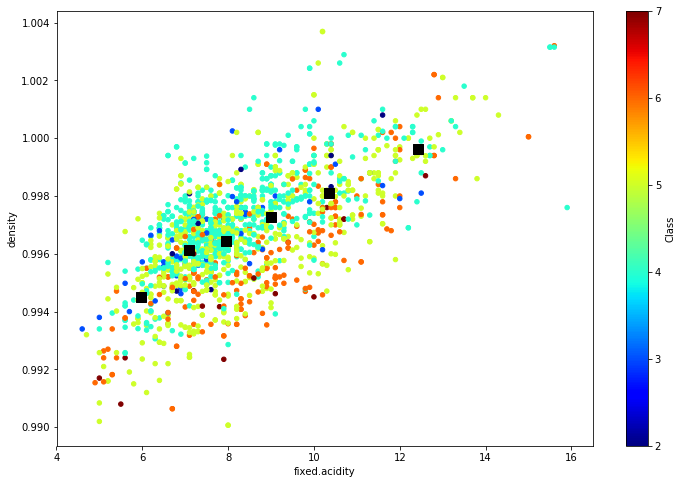

In [43]:
fig, ax = plt.subplots(1, 1)
ax.plot(centroids_df2["fixed.acidity"], centroids_df2["density"],linewidth="0") #plot each instance
wine_df.plot.scatter(x = 'fixed.acidity', y = 'density', c= 'Class', figsize=(12,8), colormap='jet', ax=ax, 
                     mark_right=False)
centroids_df2.plot.scatter(x = 'fixed.acidity', y = 'density', c = 'black', ax = ax,  s = 100, marker='s')

In [44]:
centroids_df2.head()

,fixed.acidity,density
0,10.343396,0.998098
1,7.085745,0.996125
2,12.425439,0.999619
3,7.962331,0.996459
4,5.974847,0.994493


In [64]:
slope, intercept, r, p, error = linregress(centroids_df2["fixed.acidity"], centroids_df2["density"])
fit = slope * centroids_df2["fixed.acidity"] + intercept

Text(0, 0.5, 'Density')

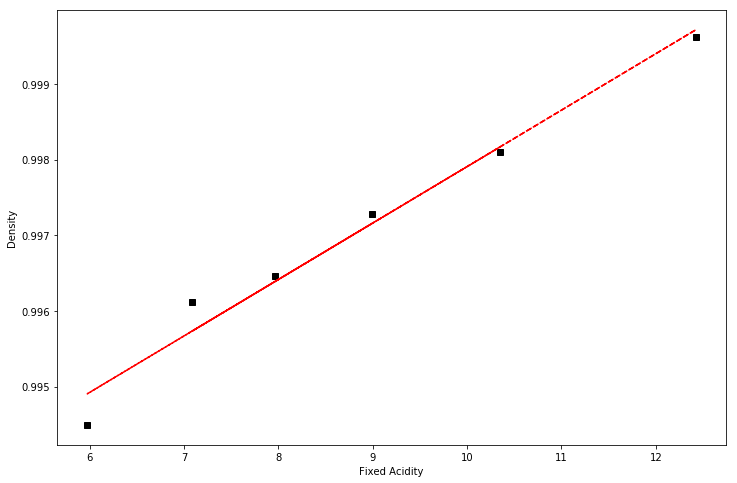

In [65]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(centroids_df2["fixed.acidity"], centroids_df2["density"],linewidth="0", marker='s', color='black')
ax.plot(centroids_df2["fixed.acidity"], fit, 'r--')
plt.xlabel("Fixed Acidity")
plt.ylabel("Density")

In [47]:
print("r:", r, 
      "error:", error)

r: 0.9884615421870915 error: 5.715903169990861e-05
